# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

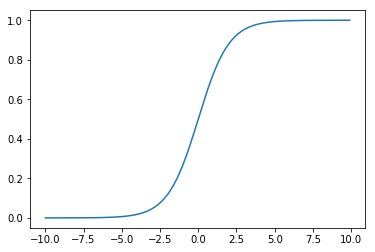

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ、<br>&emsp;&emsp;&emsp;パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>&emsp;&emsp;&emsp;Logistic Sigmoid をアクティベーション関数として<br>&emsp;&emsp;&emsp;持つパーセプトロンを用いて作成せよ。<br><br>&emsp;&emsp;&emsp;パーセプトロンのパラメータの調整には、<br>&emsp;&emsp;&emsp;平均二乗誤差と最急降下法を用いること。<br><br>&emsp;&emsp;&emsp;また、調整済みのパラメータを保存し、<br>&emsp;&emsp;&emsp;作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/perseptorn.png"/>
    <p>パーセプトロン構成図</p>
</td>
<td width="25%">
<img src="images/exp_diff.png"/>
    <p>指数微分の確認</p>
</td>
<td width="25%">
<img src="images/param_a.png"/>
    <p>パラメータa 更新式</p>
</td>
<td width="25%">
<img src="images/param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

**用意するデータ**  
入力データ = np.array([0,0,・・・,0])  # 5000個  
正解データ = np.array([1, 1,・・・・,1])  # 5000個  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  

**※正解データを Z と置く**  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測データ - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  

**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*X_i*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/q4.png" height="100%" width="100%" align="left">

### 入力データ用意

In [35]:
q3_input_data = np.zeros(5000)  # 0の配列
q3_answer = np.ones(5000)  # 1の配列
q3_data = np.stack([q3_input_data, q3_answer],1)

# 学習

mean_squared_error :  0.18109917149760932
mean_squared_error :  0.1704812449225962
mean_squared_error :  0.16065451046505802
mean_squared_error :  0.15156634646120906
mean_squared_error :  0.14316409571516847
mean_squared_error :  0.13539623117159152
mean_squared_error :  0.12821318834356832
mean_squared_error :  0.12156792233486098
mean_squared_error :  0.11541624540121627
mean_squared_error :  0.10971699542465545
mean_squared_error :  0.10443207841859264
mean_squared_error :  0.09952642055968425
mean_squared_error :  0.0949678580483313
mean_squared_error :  0.09072698674487295
mean_squared_error :  0.0867769881648988
mean_squared_error :  0.08309344404448993
mean_squared_error :  0.07965414821921882
mean_squared_error :  0.07643892187299293
mean_squared_error :  0.07342943617459637
mean_squared_error :  0.07060904480260766
mean_squared_error :  0.06796262775346645
mean_squared_error :  0.06547644703876572
mean_squared_error :  0.06313801432927857
mean_squared_error :  0.0609359702356

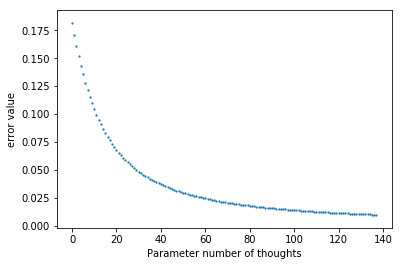

In [40]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b
    

if __name__=='__main__':
    np.random.shuffle(q3_data)  # 入力データをシャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1000):
        if mean_squared_error is not None and mean_squared_error < 0.01:  # 誤差0.01以下になったら終わり
            # 最後のパラメータを保存
            print(a, b)
            parameter["a"].append(a)
            parameter["b"].append(b)
            break
        else:
            y = neuron.input_layer(q3_data[:,0])  # 入力層
            s = neuron.activation_function(y)  # 中間層
            mean_squared_error = neuron.error_function(s, q3_data[:,1])  # 出力層　： 誤差関数

            a, b = neuron.parameter_update(q3_data[:,0], q3_data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
            parameter["a"].append(a)
            parameter["b"].append(b)
            
            print("mean_squared_error : ", mean_squared_error)
            error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1.5)

    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>&emsp;&emsp;正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>&emsp;&emsp;平均 1 分散 0.5 の正規分布に従うとする。<br><br>&emsp;&emsp;この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>&emsp;&emsp;その結果について考察し、必要があれば正解率を改善せよ。

# ----------------------------------------------------------------------
# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

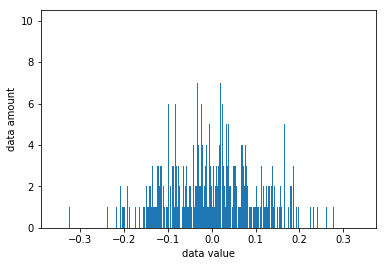

In [37]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

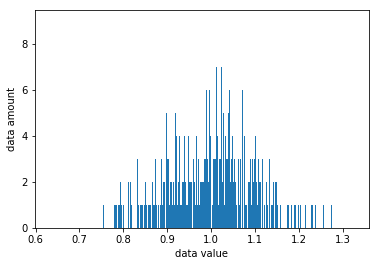

In [38]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

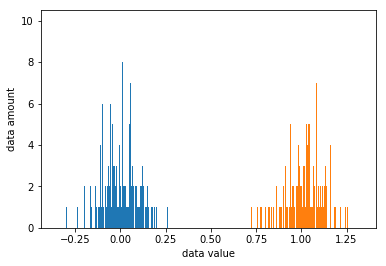

In [39]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [42]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])
input_data

array([ 0.08743097, -0.10464367, -0.0326342 , ...,  0.8993191 ,
        0.86671489,  1.0282456 ])

### 作成済みデータを保存

In [43]:
# print(type(input_1_data))
# #csvファイルとして保存
# np.savetxt('input_0_data.csv',input_0_data,delimiter=',')
# np.savetxt('input_1_data.csv',input_1_data,delimiter=',')

### 正解データを作る

In [44]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_1, answer_0])  # 1,0配列を横に結合
answer

array([1., 1., 1., ..., 0., 0., 0.])

# 学習

mean_squared_error :  0.32854210678141327
mean_squared_error :  0.3263141598436352
mean_squared_error :  0.3240838390938805
mean_squared_error :  0.3218518454415755
mean_squared_error :  0.319618886022061
mean_squared_error :  0.31738567286745284
mean_squared_error :  0.31515292154588453
mean_squared_error :  0.3129213497749188
mean_squared_error :  0.310691676015224
mean_squared_error :  0.30846461805079806
mean_squared_error :  0.3062408915621986
mean_squared_error :  0.3040212086993967
mean_squared_error :  0.30180627666083526
mean_squared_error :  0.2995967962853983
mean_squared_error :  0.2973934606638648
mean_squared_error :  0.2951969537763489
mean_squared_error :  0.2930079491620653
mean_squared_error :  0.29082710862755656
mean_squared_error :  0.2886550809992226
mean_squared_error :  0.28649250092572104
mean_squared_error :  0.2843399877354338
mean_squared_error :  0.28219814435378
mean_squared_error :  0.2800675562847448
mean_squared_error :  0.27794879066054434
mean_squared

mean_squared_error :  0.0981769618991725
mean_squared_error :  0.09773149502451117
mean_squared_error :  0.09728849678987433
mean_squared_error :  0.09684795071536713
mean_squared_error :  0.09640984057693555
mean_squared_error :  0.09597415039854129
mean_squared_error :  0.09554086444458282
mean_squared_error :  0.09510996721254791
mean_squared_error :  0.09468144342590339
mean_squared_error :  0.09425527802719888
mean_squared_error :  0.09383145617139065
mean_squared_error :  0.09340996321937742
mean_squared_error :  0.0929907847317382
mean_squared_error :  0.09257390646266794
mean_squared_error :  0.0921593143541119
mean_squared_error :  0.09174699453007937
mean_squared_error :  0.0913369332911465
mean_squared_error :  0.09092911710913539
mean_squared_error :  0.0905235326219585
mean_squared_error :  0.09012016662864163
mean_squared_error :  0.08971900608449644
mean_squared_error :  0.08932003809646212
mean_squared_error :  0.08892324991859087
mean_squared_error :  0.088528628947685

mean_squared_error :  0.04339931389782188
mean_squared_error :  0.04325402712355621
mean_squared_error :  0.043109519809523864
mean_squared_error :  0.042965787291591985
mean_squared_error :  0.0428228249315351
mean_squared_error :  0.04268062811695022
mean_squared_error :  0.04253919226117599
mean_squared_error :  0.042398512803206674
mean_squared_error :  0.04225858520760774
mean_squared_error :  0.04211940496443167
mean_squared_error :  0.04198096758912966
mean_squared_error :  0.04184326862246575
mean_squared_error :  0.04170630363042991
mean_squared_error :  0.04157006820414797
mean_squared_error :  0.04143455795979561
mean_squared_error :  0.04129976853850653
mean_squared_error :  0.04116569560628412
mean_squared_error :  0.04103233485390909
mean_squared_error :  0.04089968199685107
mean_squared_error :  0.0407677327751742
mean_squared_error :  0.040636482953447406
mean_squared_error :  0.04050592832064943
mean_squared_error :  0.04037606469007703
mean_squared_error :  0.04024688

mean_squared_error :  0.02505510687948782
mean_squared_error :  0.025001256479095416
mean_squared_error :  0.024947641079316588
mean_squared_error :  0.024894259360070416
mean_squared_error :  0.02484111000973115
mean_squared_error :  0.02478819172506927
mean_squared_error :  0.024735503211197513
mean_squared_error :  0.02468304318151399
mean_squared_error :  0.02463081035764704
mean_squared_error :  0.02457880346940026
mean_squared_error :  0.02452702125469792
mean_squared_error :  0.02447546245953
mean_squared_error :  0.024424125837899026
mean_squared_error :  0.02437301015176544
mean_squared_error :  0.02432211417099566
mean_squared_error :  0.02427143667330686
mean_squared_error :  0.024220976444216804
mean_squared_error :  0.024170732276989376
mean_squared_error :  0.024120702972584326
mean_squared_error :  0.02407088733960344
mean_squared_error :  0.02402128419424208
mean_squared_error :  0.02397189236023562
mean_squared_error :  0.02392271066880953
mean_squared_error :  0.02387

mean_squared_error :  0.01760712372278674
mean_squared_error :  0.01758238652973396
mean_squared_error :  0.01755773247009505
mean_squared_error :  0.01753316115903478
mean_squared_error :  0.017508672213900667
mean_squared_error :  0.017484265254206162
mean_squared_error :  0.01745993990161892
mean_squared_error :  0.01743569577994584
mean_squared_error :  0.01741153251511945
mean_squared_error :  0.017387449735183802
mean_squared_error :  0.017363447070281448
mean_squared_error :  0.017339524152639618
mean_squared_error :  0.017315680616556698
mean_squared_error :  0.01729191609838888
mean_squared_error :  0.017268230236537285
mean_squared_error :  0.017244622671434458
mean_squared_error :  0.017221093045531106
mean_squared_error :  0.017197641003283675
mean_squared_error :  0.017174266191141
mean_squared_error :  0.017150968257531617
mean_squared_error :  0.017127746852851698
mean_squared_error :  0.01710460162945095
mean_squared_error :  0.017081532241621483
mean_squared_error :  0

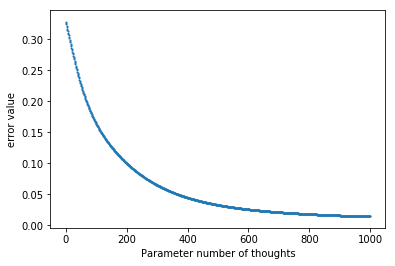

In [55]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        """
        mean_squared_error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return mean_squared_error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    mean_squared_error = None  # 誤差関数を受け取る変数
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        mean_squared_error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("mean_squared_error : ", mean_squared_error)
        error_list.append(mean_squared_error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()




## 解答パターン2 (予測結果(出力値) 10回づつをまとめた平均でパラメータ更新)

In [ ]:
# from numpy.random import *
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# import json


# class Neuron:

#     def __init__(self, a, b, v):
#         self._a = a  # 重みパラメータ
#         self._b = b  # バイアス
#         self._v = v  # ハイパーパラメータ
#         self._error = None  

#     def input_layer(self, x):
#         """線形変換
#         param1 : x (入力値)
#         """
#         if np.where(x == 0):
#             x = x + np.random.normal(0, 0.5) # 平均0, 標準偏差0.5 の 正規分布に則った 誤差あり
#             y = self._a*x + self._b 
#         if np.where(x == 1):
#             x = x + np.random.normal(1, math.sqrt(0.5)) # 平均1, 標準偏差0.5 の 正規分布に則った 誤差あり
#             y = self._a*x + self._b
#         return y

#     def activation_function(self, y):
#         """活性化関数
#         param1 : y (入力層の計算結果)
#         """
#         s = 1 / (1 + math.e**-y)  # シグモイド関数
#         return s

#     def error_function(self, s, answer):
#         """誤差関数
#         param1 :  s (出力値)
#         param2 :  answer (正解値)
#         """
#         mean_squared_error = sum(s - answer)**2/len(answer)  # 平均二乗誤差関数
#         return mean_squared_error

#     def parameter_update(self, ten_times_error, ten_times_output):
#         """パラメータ更新
#         param1 : answer (正解値)
#         param2 : predicted_data (予測データ)
#         """
#         print("ten_times_error : ", ten_times_error)
#         print("ten_times_output : ", ten_times_output)
#         self._a = self._a - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._a*ten_times_output)*(1-ten_times_output)))  # 重みパラメータ
#         self._b = self._b - self._v*2*(sum((ten_times_error)/len(ten_times_output)*(self._b*ten_times_output)*(1-ten_times_output)))  # バイアス
#         return self._a, self._b    


# if __name__=='__main__':
#     data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] は次の様に用意[array([-0.65254759,  0.63492252,  0.32712462, ...,  3.54405229, 0.42009267,  2.46580509]) , array([0., 1., 0., ..., 1., 0., 1.])]この形にする
#     np.random.shuffle(data)   # シャッフル
#     a = 0.5   # 初期値のパラメータ
#     b = 0.3  # バイアス
#     v = 0.1  # ハイパーパラメータ(調整項)
#     error_list = []  # 誤差リスト(出力用に集計)
#     mean_squared_error = None  # 誤差関数を受け取る変数
#     neuron = Neuron(a, b, v)  # インスタンス化 
#     parameter = {"a":[], "b":[]}
#     ten_times_error = []  # 10回分の誤差保存用
#     ten_times_output = []  # 10回分の出力保存用
    
#     for j in range(1000):
#         if  j == 0 or j%10 != 0:  
#             y = neuron.input_layer(data[:,0])  # 入力層
#             s = neuron.activation_function(y)  # 中間層
#             ten_times_output.append(s)
#             ten_times_error.append(neuron.error_function(s, data[:,1]))  # 出力層　： 誤差関数
#             print("ten_times_error : ", ten_times_error)
#         else:
#             # 10回分の誤差の平均をupdate(誤差平均)
#             ten_times_error = ten_times_error[0]/10
#             print("else : ", ten_times_error/len(ten_times_output))
#             print("else : ", type(ten_times_error))    
#             print("ten_times_output : ", len(ten_times_output)+1)
#             a, b = neuron.parameter_update(ten_times_error, ten_times_output)  # パラメータ更新
#             parameter["a"].append(a)
#             parameter["b"].append(b)
#             ten_times_error = []  # 10回分の誤差保存用
#             ten_times_output = []  # 10回分の出力保存用

#             print("mean_squared_error : ", mean_squared_error)
#             error_list.append(mean_squared_error)

#     # 更新済みパラメータ保存
#     print("書き出し parameter : ", parameter)
#     with open('output/output_Q4.json', 'w') as f:
#         json.dump(parameter, f)
            
#     # 描画
#     print("error_list: ", error_list)
#     print("学習回数 : %s 回" % len(error_list))
#     plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
#     plt.xlabel('Parameter number of thoughts')
#     plt.ylabel('error value')
#     plt.show()
    
